# World Happiness Report Data Analysis
## by Tony Cioara

In this NoteBook we will take a look at some interesting data from the World Hapiness Report.

The main attribute that this analysis will be focused on is Generosity.

Which countrie are the most generous?

What makes a country generous?

Why are some countries more generous than others?

Is there a recipe for generosity?

###### You might observe that even though we have data for 2015, 2016, and 2017, I have mostly focused on 2016. I have made this decision because I realized that the datasets we simmilar enough from year to year so I have made the executive decision of looking at 2016.

#### Let's start by importing our libraries and reading our csvs.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')

In [3]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Let's take a look at which regions of the world are the most generous!
It looks like Austrailia and New Zealand is number one, while Central and Eastern Europe is last.

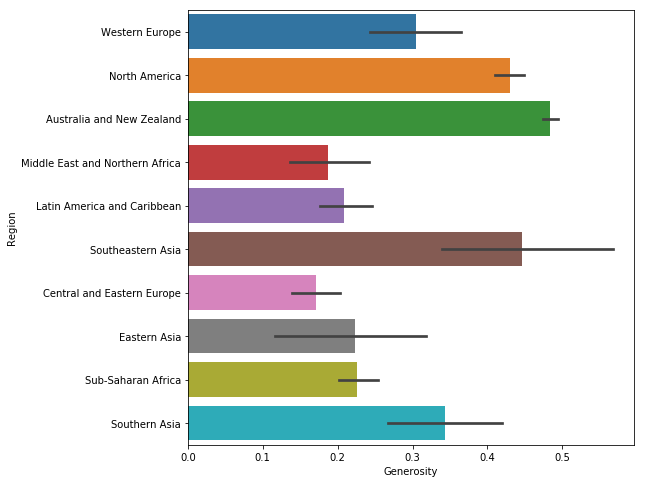

In [4]:
plt.subplots(figsize = (8, 8))
sns.barplot(y=df_2016['Region'], x=df_2016["Generosity"])

### Now let's also take a look at the GDPs. This way we can see if there's any obvious pattern!

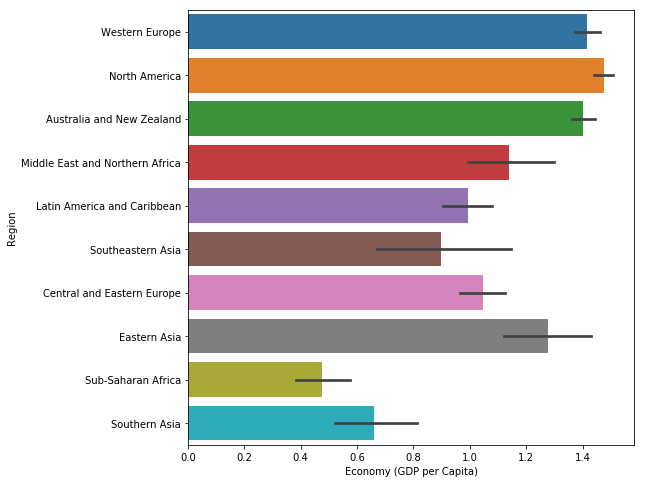

In [5]:
plt.subplots(figsize = (8, 8))
sns.barplot(y=df_2016['Region'], x=df_2016["Economy (GDP per Capita)"])

### Let's plot out the Generosity and GDP of countries to see if there is any corelation!
It's clear that there is no relationship whatsoever between GDP and Generosity

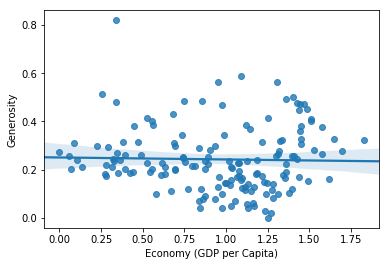

In [6]:
sns.regplot(y='Generosity', x='Economy (GDP per Capita)', fit_reg=True, data=df_2016)

### Here's a mind twister
How come Freedom and GDP are correlated?

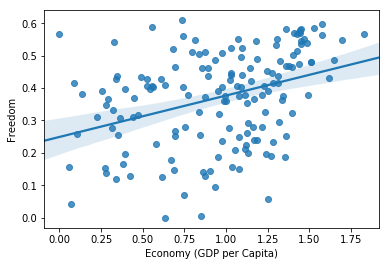

In [7]:
sns.regplot(y='Freedom', x='Economy (GDP per Capita)', fit_reg=True, data=df_2016)

And Freedom and Generosity are correlated?

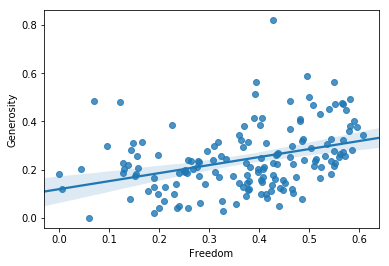

In [8]:
sns.regplot(y='Generosity', x='Freedom', fit_reg=True, data=df_2016)

### But there is no correlation between GDP and Generosity?

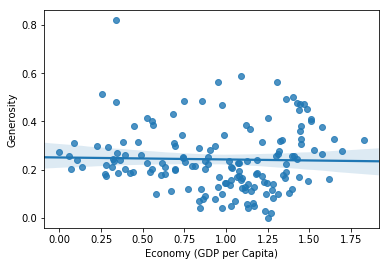

In [9]:
sns.regplot(y='Generosity', x='Economy (GDP per Capita)', fit_reg=True, data=df_2016)

### Maybe by plotting out the most generous countries we can find something out. Let's see the top 30!
You go Myanmar!

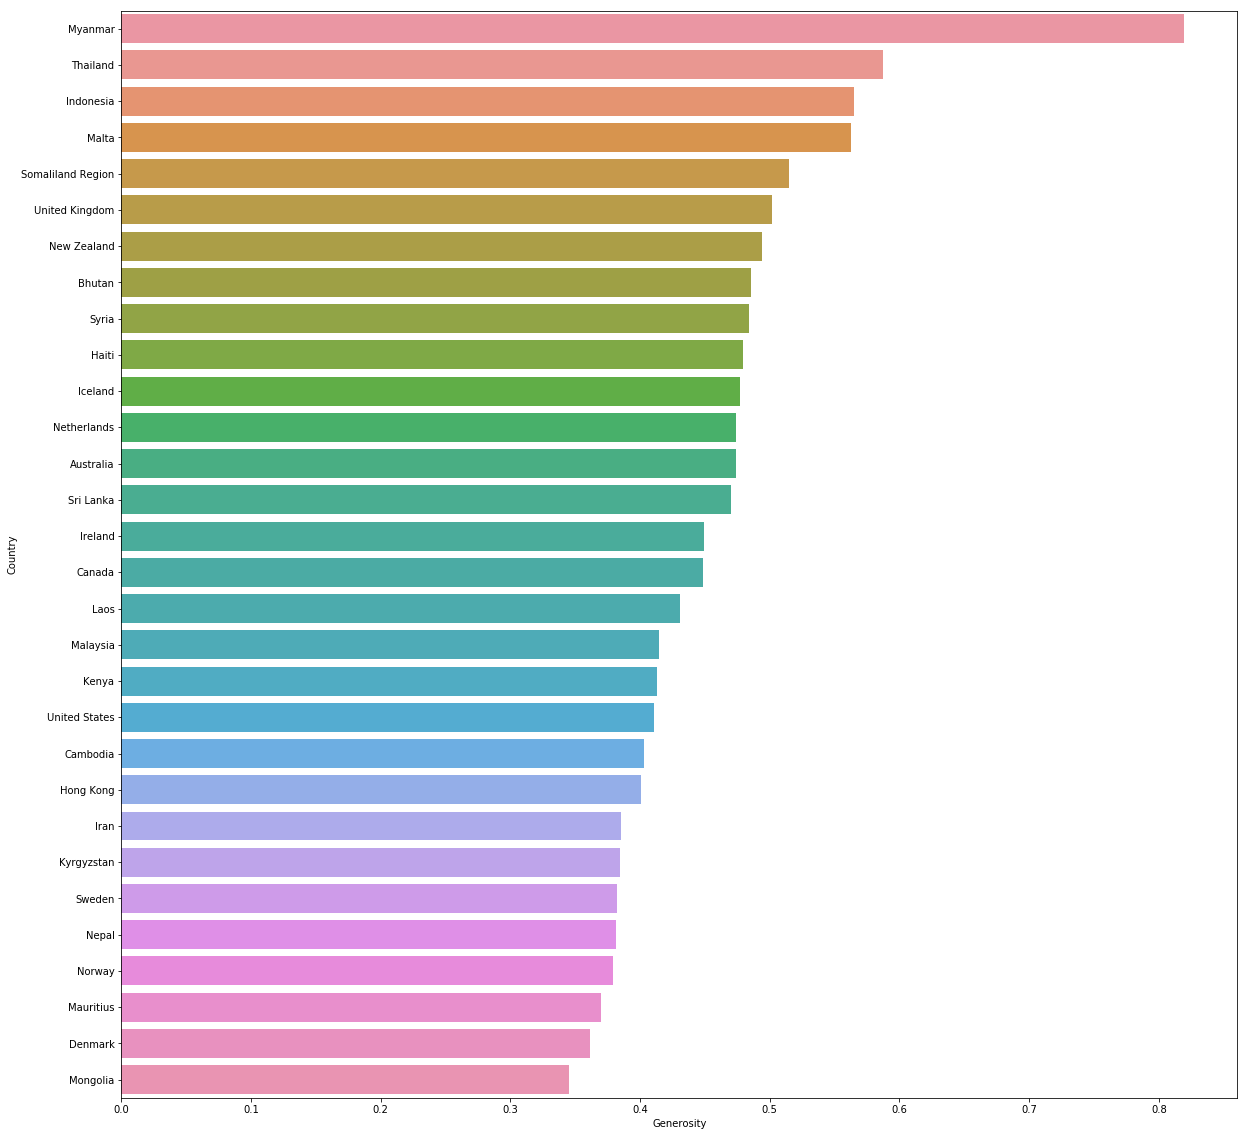

In [10]:
plt.subplots(figsize=(20, 20))
generosities = df_2016.sort_values(by='Generosity', ascending=False)
sns.barplot(x = generosities['Generosity'][:30], y = generosities['Country'][:30])

### And the least generous...
Greece looks like the data is missing so let's just check the 2017 data to make sure.

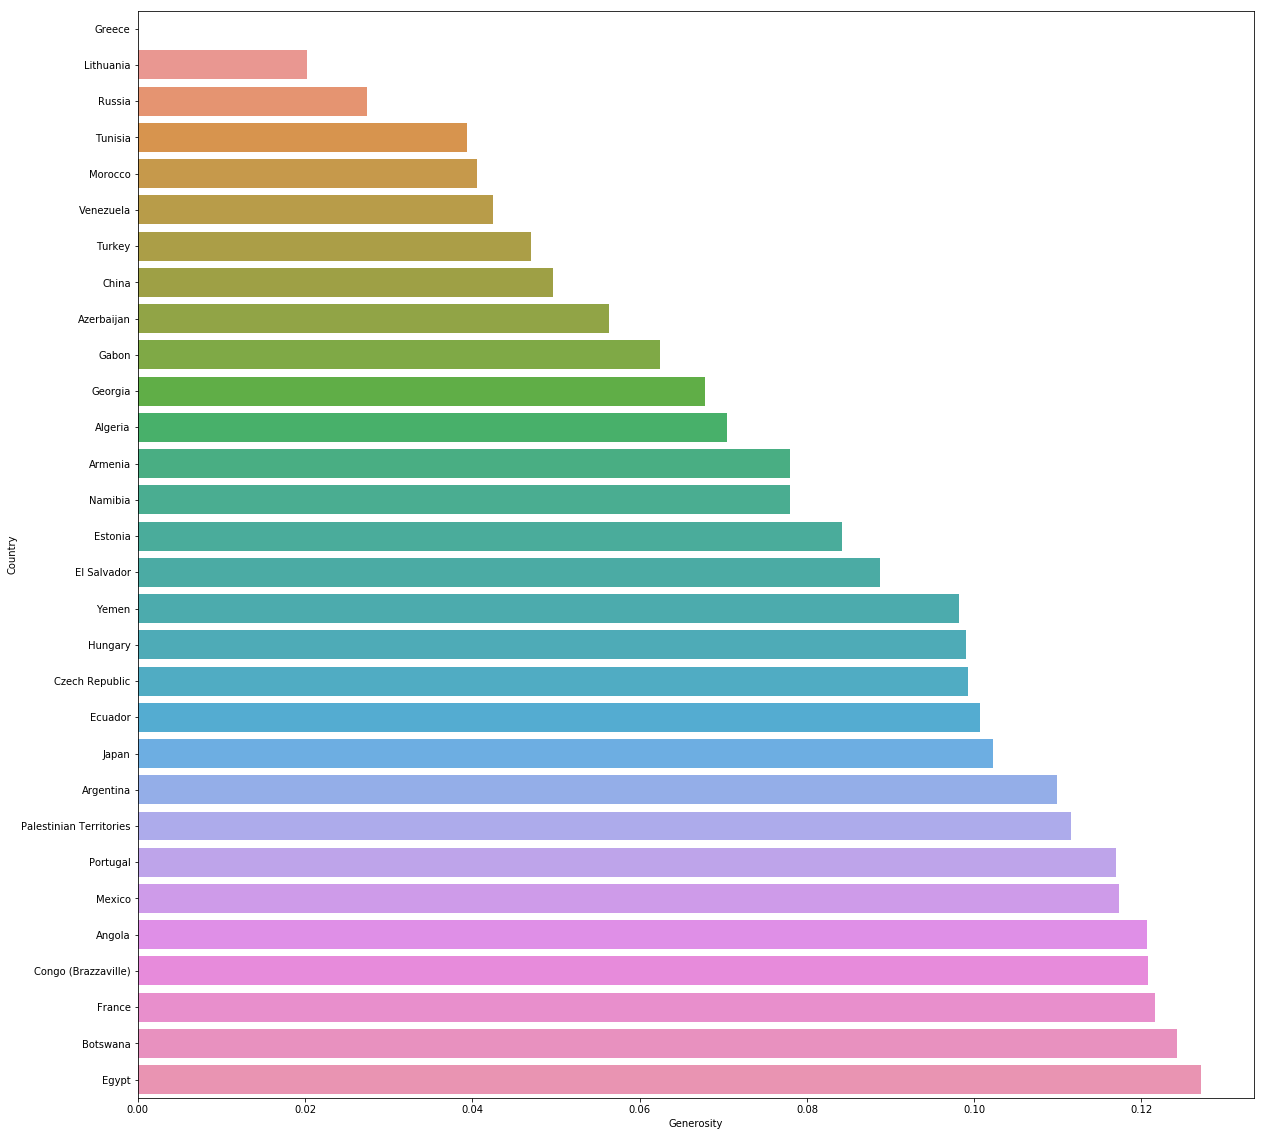

In [11]:
plt.subplots(figsize=(20, 20))
generosities = df_2016.sort_values(by='Generosity', ascending=True)
sns.barplot(x = generosities['Generosity'][:30], y = generosities['Country'][:30])

### WHAT !? Let's also check 2015 just to be sure sure.

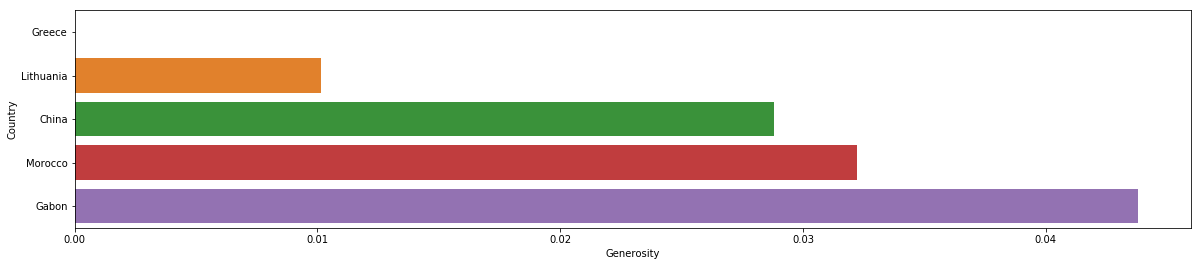

In [12]:
plt.subplots(figsize=(20, 4))
generosities = df_2017.sort_values(by='Generosity', ascending=True)
sns.barplot(x = generosities['Generosity'][:5], y = generosities['Country'][:5])

### HOW?!
It's probably of all the old men walking around

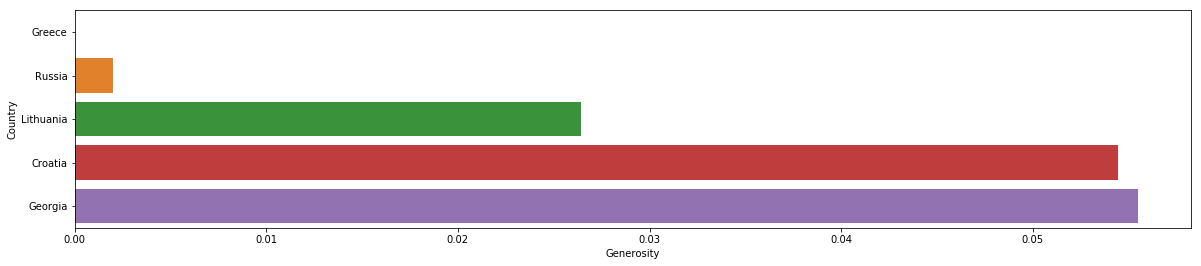

In [13]:
plt.subplots(figsize=(20, 4))
generosities = df_2015.sort_values(by='Generosity', ascending=True)
sns.barplot(x = generosities['Generosity'][:5], y = generosities['Country'][:5])

### Generosity in Eastern Europe
Seeing how the generosity of Eastern European Countries is quite low and Russia has the second lowest generosity on Earth, I'm curious how generous countries that have been part of the USSR fare against those that were Satelite States of the USSR.

For those who don't know, while the USSR has anexed many Eastern European countries, some countries were not directly ruled by the USSR, but because of the regional powe of the USSR, have become communist states under dictators different from Stalin and had close ties to Russia.

###### Let's first create a df of all the countries from Central and Eastern Europe based on Generosity

In [14]:
df_eastern_europe_2016 = df_2016[df_2016["Region"] == "Central and Eastern Europe"]
df_eastern_europe_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
26,Czech Republic,Central and Eastern Europe,27,6.596,6.515,6.677,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,2.96211
44,Slovakia,Central and Eastern Europe,45,6.078,5.996,6.160,1.27973,1.08268,0.70367,0.23391,0.02947,0.13837,2.61065
48,Uzbekistan,Central and Eastern Europe,49,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
53,Kazakhstan,Central and Eastern Europe,54,5.919,5.837,6.001,1.22943,0.95544,0.57386,0.40520,0.11132,0.15011,2.49325
54,Moldova,Central and Eastern Europe,55,5.897,5.823,5.971,0.69177,0.83132,0.52309,0.25202,0.01903,0.19997,3.38007


### Now let's plot all of them and see if we can see some patterns!
Some of these countries aren't even from Europe!

Besides, it does not look like any pattern as the countries at the top are scattered all over and it is not obvious whether some regions are more generous than others.

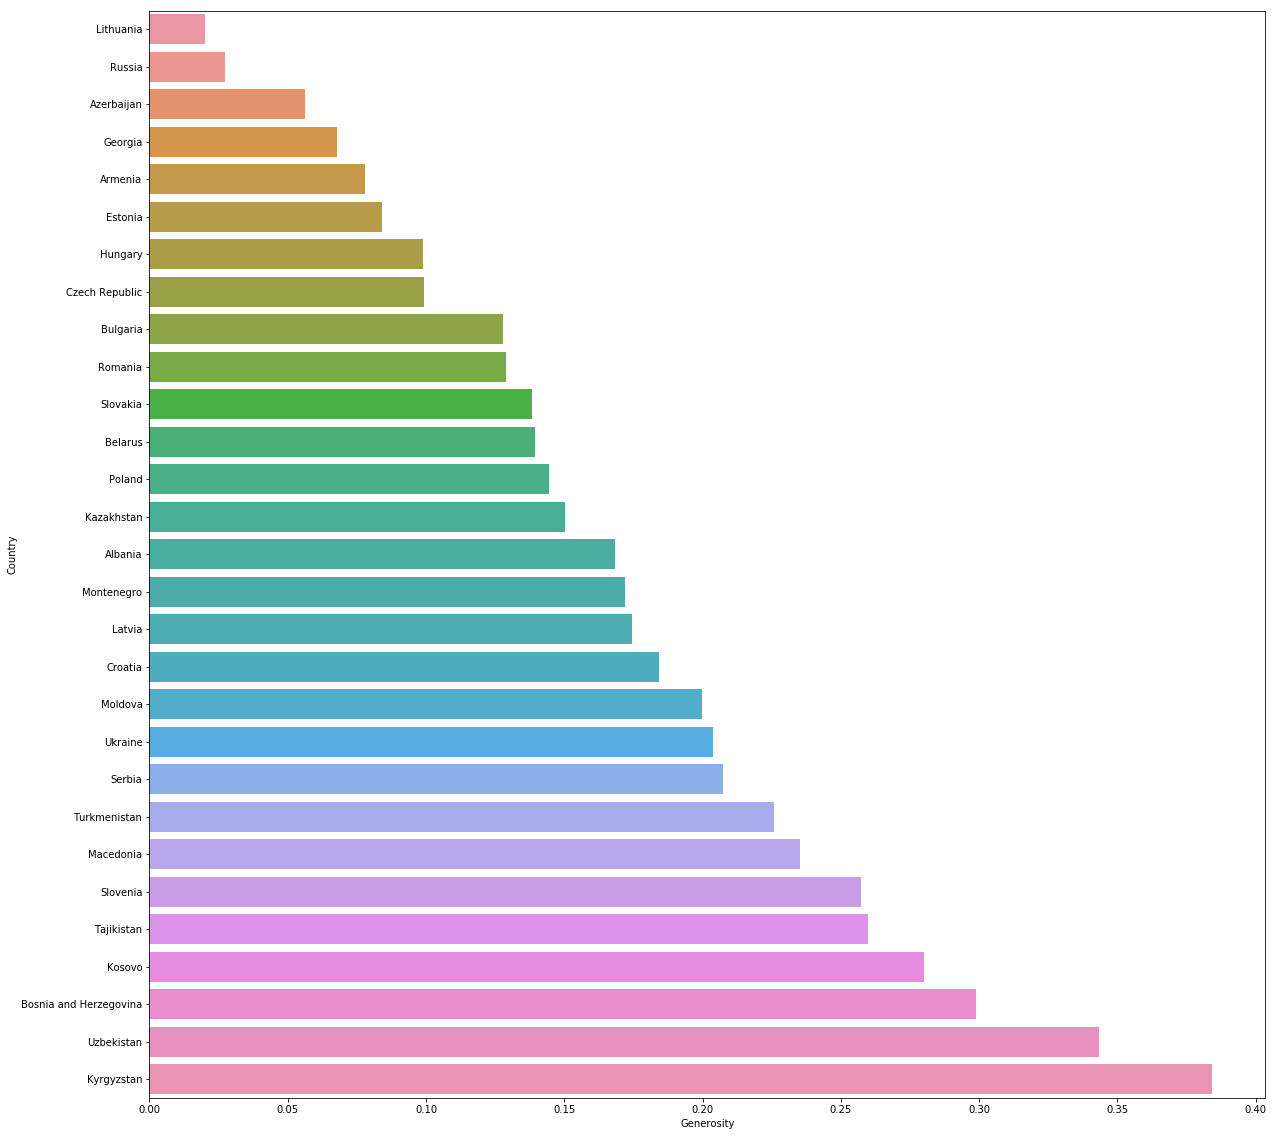

In [19]:
plt.subplots(figsize=(20, 20))
generosities = df_eastern_europe_2016.sort_values(by='Generosity', ascending=True)
sns.barplot(x = generosities['Generosity'], y = generosities['Country'])

If we plot out Generosity based Dystopia Residual we can see how countries that have been through more fare on the generosity scale.

In countries that have suffered more historical trauma, the people are less generous.

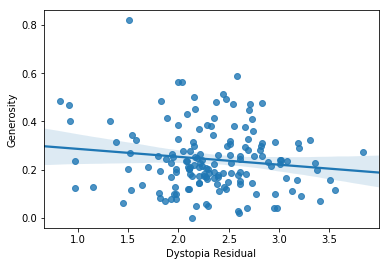

In [17]:
sns.regplot(y='Generosity', x='Dystopia Residual', fit_reg=True, data=df_2016)

We can also see a small correlation between Life Expectancy and Generosity, but it's nothing crazy.

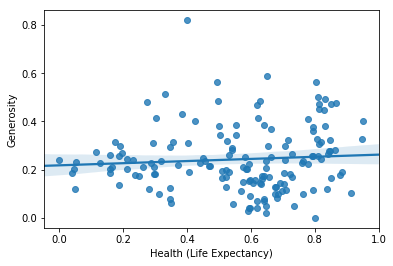

In [20]:
sns.regplot(y='Generosity', x='Health (Life Expectancy)', fit_reg=True, data=df_2016)

### Conclusion

We have observed that countries that are more free and have longer life expectancies are also slightly more generous.

We have also seen that countries that have been through tougher historical times are less generous.

Those observations, however, do not account regions for the vast generosity differences between countries.

### The main observation we can make from our analysis is that there is no clear receipe for making a country more generous. There are vast historical and socio-economical factors coming into play, but a bit more freedom always helps.
